## Automatic Speech Recognition (Introduction)

Author: Andrei Gabriel Popescu [ Orange Services ] [andrei.popescu@orange.com]

##### What is ASR ?

It's a technology that uses artificial intelligence to convert spoken language into written text. It's widely used in apps like TikTok, Instagram, Spotify, and Zoom for features like real-time captions and transcribing meetings. 

##### Hostory of ASR

ASR as we know it extends back to 1952 when the infamous ```Bell Labs created “Audrey,” a digit recognizer```. Audrey could only transcribe spoken numbers, but a decade later, researchers improved upon Audrey so that it could transcribe rudimentary spoken words like “hello”.

For most of the past fifteen years, ASR has been powered by classical Machine Learning technologies like Hidden Markov Models. Though once the industry standard, accuracy of these classical models had plateaued in recent years, opening the door for new approaches powered by advanced Deep Learning technology that’s also been behind the progress in other fields such as self-driving cars.

In 2014, ```Baidu``` published the infamous paper, ```Deep Speech: Scaling up end-to-end speech recognition```. In this paper, the researchers demonstrated the strength of applying Deep Learning research to power State-of-the-Art, accurate Speech Recognition systems. The paper kicked off a renaissance in the field of ASR, popularizing the Deep Learning approach and pushing model accuracy past the plateau and closer to human level.

##### But what about security risks associated with storing ASR data? 

Companies using ASR usually do not encrypt audio transmitted between their servers or clients unless required under privacy laws. This leaves data vulnerable during transmission. While storing audio files presents a risk because companies host copies of user files, they don't store them in plaintext; instead they rely heavily on encryption both at rest and during processing pipelines that transmit data across multiple services. Encryption keys are managed via hardware security modules, ensuring no unauthorized personnel ever gains access without proper credentials. In conclusion, while audio transmissions aren't encrypted in most cases, top companies handling ASR will apply strict access controls based around least privilege principles. No sensitive information should be stored in decoded texts unless necessary, following strict guidelines regarding retention periods before destroying copies securely. Ultimately, audio transmission security risks pose little concern since modern best practices address them effectively for customers.


#### Approches

```Traditional Hybrid Approach```

The traditional hybrid approach is the legacy approach to Speech Recognition and has dominated the field for the past fifteen years. Many companies still rely on this traditional hybrid approach simply because it’s the way it has always been done--there is more knowledge around how to build a robust model because of the extensive research and training data available, despite plateaus in accuracy.

- Traditional HMM and GMM systems

![Tranditional systems](https://lh3.googleusercontent.com/Ob6V9bDqghzL32kRQRSSqs0swjKiQuOYiYxZzChVLqbJQRki0PM0ucZiNQnZw1X8uM9IfWdQBQxF33lX0NN_xqkUetxJsSCio6vqo8mKbQ_9-Q1FN-zVL-mdtMsXh6RPSJhHhhZu)

Traditional HMM (Hidden Markov Models) and GMM (Gaussian Mixture Models) require forced aligned data. Force alignment is the process of taking the text transcription of an audio speech segment and determining where in time particular words occur in the speech segment.

As you can see in the above illustration, this approach combines a lexicon model + an acoustic model + a language model to make transcription predictions.

Each step is defined in more detail below:

- Lexicon Model
The lexicon model describes how words are pronounced phonetically. You usually need a custom phoneme set for each language, handcrafted by expert phoneticians.

- Acoustic Model
The acoustic model (AM), models the acoustic patterns of speech. The job of the acoustic model is to predict which sound or phoneme is being spoken at each speech segment from the forced aligned data. The acoustic model is usually of an HMM or GMM variant.

- Language Model
The language model (LM) models the statistics of language. It learns which sequences of words are most likely to be spoken, and its job is to predict which words will follow on from the current words and with what probability.

- Decoding
Decoding is a process of utilizing the lexicon, acoustic, and language model to produce a transcript.

Downsides of Using the Traditional Hybrid Approach

Though still widely used, the traditional hybrid approach to Speech Recognition does have a few drawbacks. Lower accuracy, as discussed previously, is the biggest. In addition, each model must be trained independently, making them time and labor intensive. Forced aligned data is also difficult to come by and a significant amount of human labor is needed, making them less accessible. Finally, experts are needed to build a custom phonetic set in order to boost the model’s accuracy.

2. End-to-End Deep Learning Approach

An end-to-end Deep Learning approach is a newer way of thinking about ASR, and how Orange Services is approaching ASR today.

- How End-to-End Deep Learning Models Works ?

With an end-to-end system, you can directly map a sequence of input acoustic features into a sequence of words. The data does not need to be force-aligned. Depending on the architecture, a Deep Learning system can be trained to produce accurate transcripts without a lexicon model and language model, although language models can help produce more accurate results.

- CTC, LAS, and RNNT

```CTC```: Connectionist Temporal Classification (CTC) is a loss function that can be used to train neural networks for sequence data where the timing of the output does not match the timing of the input. CTC is used in ASR to train a neural network to produce a sequence of characters from an audio segment.

```LAS```: Listen, Attend, and Spell (LAS) is a Deep Learning architecture that uses an encoder-decoder architecture with an attention mechanism to produce a sequence of characters from an audio segment.

```RNNT```: Recurrent Neural Network Transducer (RNNT) is a Deep Learning architecture that uses an encoder-decoder architecture with an attention mechanism to produce a sequence of characters from an audio segment.

CTC, LAS, and RNNTs are popular Speech Recognition end-to-end Deep Learning architectures. These systems can be trained to produce super accurate results without needing force aligned data, lexicon models, and language models, although language ```models can help produce more accurate results.```

- Advantages of End-to-End Deep Learning Models

End-to-end Deep Learning models are easier to train and require less human labor than a traditional approach. They are also more accurate than the traditional models being used today.

The Deep Learning research community is actively searching for ways to constantly improve these models using the latest research as well, so there’s no concern of accuracy plateaus any time soon--in fact, we’ll see Deep Learning models reach human level accuracy in the next few years.


For more information I recommend this paper from Orange Labs France: [paper](https://arxiv.org/abs/2112.12572).


#### Pytorch Wav2Vec tutorial

In [2]:
import torch
import torchaudio
import IPython
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
print("Available devices: ", torch.cuda.device_count())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


2.0.1+cu117
2.0.2+cu117
Available devices:  1


##### Data

- for this part we will use data available in torchaudio module

In [3]:
SPEECH_FILE = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

In [4]:
# You can check file location by printing the variable.
SPEECH_FILE

'/home/popescuandrei/.cache/torch/hub/torchaudio/tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav'

From: [PyTorch Documentation](https://pytorch.org/audio/stable/tutorials/speech_recognition_pipeline_tutorial.html)

First, we will create a Wav2Vec2 model that performs the feature extraction and the classification.

There are two types of Wav2Vec2 pre-trained weights available in torchaudio. The ones fine-tuned for ASR task, and the ones not fine-tuned.

Wav2Vec2 (and HuBERT) models are trained in self-supervised manner. They are firstly trained with audio only for representation learning, then fine-tuned for a specific task with additional labels.

The pre-trained weights without fine-tuning can be fine-tuned for other downstream tasks as well, but this tutorial does not cover that.

We will use ``` torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H ``` here.

There are multiple pre-trained models available in torchaudio.pipelines. Please check the documentation for the detail of how they are trained.

The bundle object provides the interface to instantiate model and other information. Sampling rate and the class labels are found as follow.

In [5]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H

print("Sample Rate:", bundle.sample_rate)

print("Labels:", bundle.get_labels())

Sample Rate: 16000
Labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [6]:
model = bundle.get_model().to(device)

print(model.__class__)

<class 'torchaudio.models.wav2vec2.model.Wav2Vec2Model'>


In [7]:
IPython.display.Audio(SPEECH_FILE)

#### Sampling rate and why is important

Some of the sound files are sampled at a sample rate of 48000Hz, while most are sampled at a rate of 44100Hz. This means that 1 second of audio will have an array size of 48000 for some sound files, while it will have a smaller array size of 44100 for the others. Once again, we must standardize and convert all audio to the same sampling rate so that all arrays have the same dimensions.

In this case, it means that if the audio file have a different sampling compared with what the model expects, we need to resample it.

In [8]:
waveform, sample_rate = torchaudio.load(SPEECH_FILE)
waveform = waveform.to(device)

if sample_rate != bundle.sample_rate:
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

#### Note

Although the model can perform feature extraction and classification in one step, we will split the steps for this tutorial.

In [9]:
with torch.inference_mode():
    features, _ = model.extract_features(waveform)

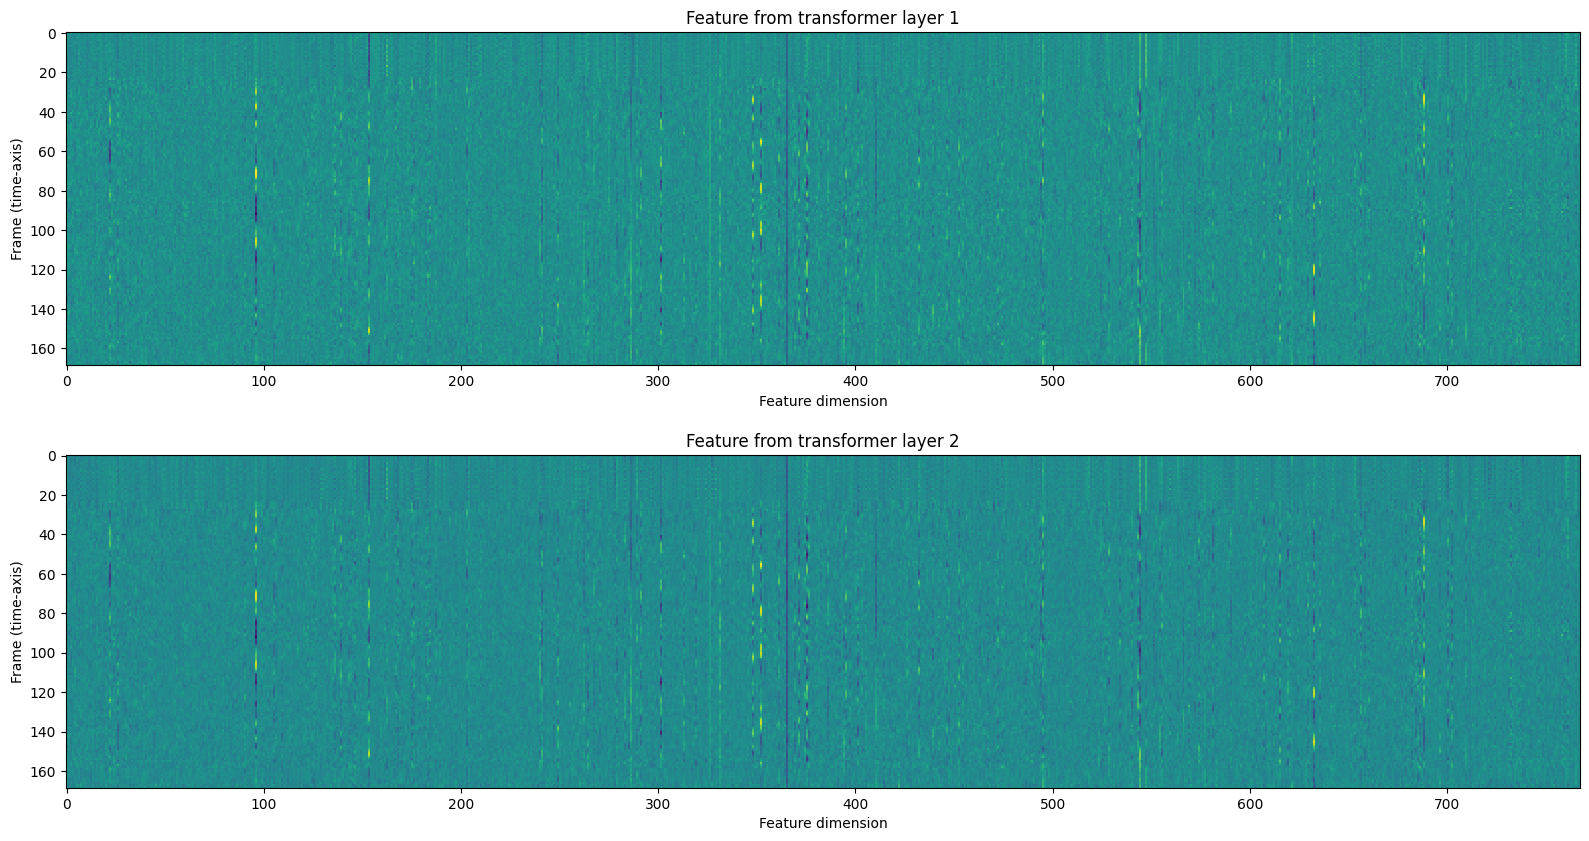

In [10]:
MAX_PLOTS = 2

fig, ax = plt.subplots(MAX_PLOTS, 1, figsize=(16, 4.3 * MAX_PLOTS))
for i, feats in enumerate(features):
    if i >= MAX_PLOTS:
        break
    ax[i].imshow(feats[0].cpu(), interpolation="nearest")
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()

#### Note

Once the acoustic features are extracted, the next step is to classify them into a set of categories.


In [11]:
with torch.inference_mode():
    emission, _ = model(waveform)

#### Note
We will ouput the features in a visual form.

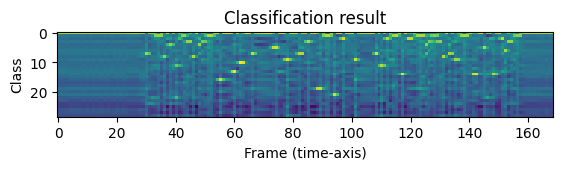

Class labels: ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


In [12]:
plt.imshow(emission[0].cpu().T, interpolation="nearest")
plt.title("Classification result")
plt.xlabel("Frame (time-axis)")
plt.ylabel("Class")
plt.show()
print("Class labels:", bundle.get_labels())

#### Generating transcripts

From [PyTorch Documentatiom](https://pytorch.org/audio/stable/tutorials/speech_recognition_pipeline_tutorial.html)

From the sequence of label probabilities, now we want to generate transcripts. The process to generate hypotheses is often called “decoding”.

Decoding is more elaborate than simple classification because decoding at certain time step can be affected by surrounding observations.

For example, take a word like ```night``` and ```knight```. Even if their prior probability distribution are differnt (in typical conversations, night would occur way more often than knight), to accurately generate transcripts with knight, such as a knight with a sword, the decoding process has to postpone the final decision until it sees enough context.

There are many decoding techniques proposed, and they require external resources, such as word dictionary and language models.

In this tutorial, for the sake of simplicity, we will perform greedy decoding which does not depend on such external components, and simply pick up the best hypothesis at each time step. Therefore, the context information are not used, and only one transcript can be generated.

We start by defining greedy decoding algorithm.

In [13]:
class GreedyCTCDecoder(torch.nn.Module):
    def __init__(self, labels, blank=0):
        super().__init__()
        self.labels = labels
        self.blank = blank

    def forward(self, emission: torch.Tensor) -> str:
        """Given a sequence emission over labels, get the best path string
        Args:
          emission (Tensor): Logit tensors. Shape `[num_seq, num_label]`.

        Returns:
          str: The resulting transcript
        """
        indices = torch.argmax(emission, dim=-1)  # [num_seq,]
        indices = torch.unique_consecutive(indices, dim=-1)
        indices = [i for i in indices if i != self.blank]
        return "".join([self.labels[i] for i in indices])

In [14]:
decoder = GreedyCTCDecoder(labels=bundle.get_labels())
transcript = decoder(emission[0])

In [15]:
print(transcript)
IPython.display.Audio(SPEECH_FILE)

I|HAD|THAT|CURIOSITY|BESIDE|ME|AT|THIS|MOMENT|


#### Conclusion
The ASR model is fine-tuned using a loss function called Connectionist Temporal Classification (CTC). The detail of CTC loss is explained [here](https://distill.pub/2017/ctc/). In CTC a blank token (ϵ) is a special token which represents a repetition of the previous symbol. In decoding, these are simply ignored.


#### Applications of ASR systems

The immense advances in the field of ASR has seen a correlation of growth in Speech-to-Text APIs. Companies are using ASR technology for Speech-to-Text applications across a diverse range of industries. Some examples include:

- Telephony: Call tracking, cloud phone solutions, and contact centers need accurate transcriptions, as well as innovative analytical features like Conversation Intelligence, call analytics, speaker diarization, and more.

- Video Platforms: Real-time and asynchronous video captioning are industry standard. Video editing platforms (and video editors alike) also need content categorization and content moderation to improve accessibility and search.

- Media Monitoring: Speech-to-Text APIs can help broadcast TV, podcasts, radio, and more quickly and accurately detect brand and other topic mentions for better advertising.

- Virtual Meetings: Meeting platforms like Zoom, Google Meet, WebEx, and more need accurate transcriptions and the ability to analyze this content to drive key insights and action.

#### Let's continue with a more `industry` appoach

In most of the industry usecases, we will use a pretrained existing model with `comercial license` and which have proven a good trade-off between accuracy / performance and speed. In most of the cases, execution time / speed is critical and we prefer to use models which are not the best, but have a good performance for thier execution time.


##### A short decscription for OpenAI Whisper

OpenAI Whisper is a state-of-the-art speech recognition system that is fast, accurate, and reliable. It is built on top of the latest research in speech recognition, including our own research in transfer learning and unsupervised pre-training. It is designed to be easy to use, with a simple API that can be used to transcribe audio files or live audio streams.

Example tutorial: [OpenAI Whisper](https://github.com/openai/whisper/blob/main/notebooks/Multilingual_ASR.ipynb). I strongly recommend to read this tutorial and to understand the concepts behind it.

Most of the time, althought Whisper is a good mode (here talking about `large variant`), it is not suitable for real time usecases. You can read more about this topic [here](https://huggingface.co/spaces/openai/whisper/discussions/76). 

##### A solution for real time usecases...

Taking apart the fact that we can use a smaller model and tune the process of sending data to the model itself in small batches, we can consider using solutions designed for small energy consumption devices, such as ```tflite``` models. Tensorflow Lite is a set of tools to help developers run TensorFlow models on mobile, embedded, and IoT devices. It enables on-device machine learning inference with low latency and a small binary size. TensorFlow Lite also supports hardware acceleration with the Android Neural Networks API.

- ASR with TF Lite models

The TensorFlow Lite Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications. This means that we can switch our attention to a similar model, as the one desribe above, but this time in a TF and then convert it to a TF Lite model.